In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode()
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy import stats

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
Train=pd.read_csv("C:/Users/Bhaskara/Downloads/Summer/Work/Diabetes/diabetes.csv")
Positives=Train[Train['Outcome']==1]
Negatives=Train[Train['Outcome']==0]

In [3]:
Train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


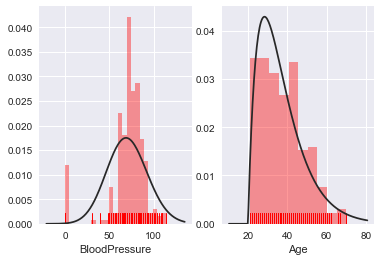

In [136]:
plt.figure(figsize=(15,10))
fig, ax =plt.subplots(1,2)
#sns.distplot(Positives['Pregnancies'],rug=True,kde=False,color='r',fit=stats.gamma,ax=ax[0])
sns.distplot(Positives['BloodPressure'],rug=True,kde=False,color='r',fit=stats.gamma,ax=ax[0])
sns.distplot(Positives['Age'],rug=True,kde=False,color='r',fit=stats.gamma,ax=ax[1])
fig.show()

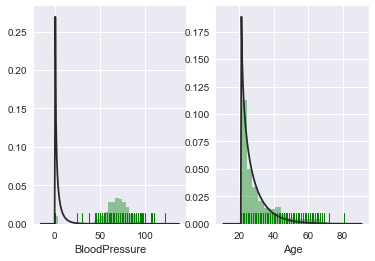

In [137]:
fig, ax =plt.subplots(1,2)
#sns.distplot(Negatives['Pregnancies'],rug=True,kde=False,color='g',fit=stats.gamma,ax=ax[0])
sns.distplot(Negatives['BloodPressure'],rug=True,kde=False,color='g',fit=stats.gamma,ax=ax[0])
sns.distplot(Negatives['Age'],rug=True,kde=False,color='g',fit=stats.gamma,ax=ax[1])
fig.show()

Model data with Random Forest to identify significant variables

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(Train.drop(['Outcome'],axis=1), Train.Outcome)
features = Train.drop(['Outcome'],axis=1).columns.values

In [141]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Significance of features',
     width = 900, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.plot(fig1)

'file://C:\\Users\\Bhaskara\\Downloads\\Summer\\Work\\Diabetes\\temp-plot.html'

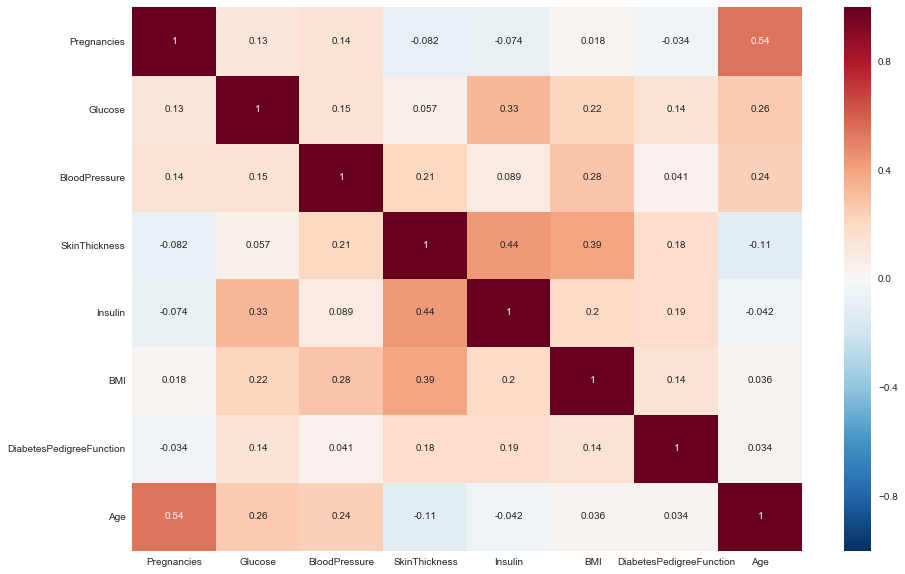

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(Train.drop(['Outcome'],axis=1).corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [7]:
X = Train.drop(['Outcome'], axis=1)
features = X.columns
X = X.values
y = Train['Outcome'].values

Startified Sampling of data and modelling the data
Using Logistic Regression with elastic net to model the data

In [8]:
model=sklearn.linear_model.SGDClassifier(loss='log', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15)

In [17]:

skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    break

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy and Metrics of Logistic with elastic net')
print(accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred))

Accuracy and Metrics of Logistic with elastic net
0.616883116883
[[67 33]
 [26 28]]
             precision    recall  f1-score   support

          0       0.72      0.67      0.69       100
          1       0.46      0.52      0.49        54

avg / total       0.63      0.62      0.62       154



Random forest classifier predicts with improved accuracy over LR with elastic net

In [146]:
rf=RandomForestClassifier(random_state=0)

In [19]:

skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    break

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy and Metrics of Random Forest')
print(accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred))


Accuracy and Metrics of Random Forest
0.779220779221
[[89 11]
 [23 31]]
             precision    recall  f1-score   support

          0       0.79      0.89      0.84       100
          1       0.74      0.57      0.65        54

avg / total       0.77      0.78      0.77       154



#Over Sample the data as the classes in outcome are highly disproportionate

In [15]:
lr=LogisticRegression()

In [18]:

skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    break

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy and Metrics of Logistic')
print(accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred))

Accuracy and Metrics of Logistic
0.766233766234
[[89 11]
 [25 29]]
             precision    recall  f1-score   support

          0       0.78      0.89      0.83       100
          1       0.72      0.54      0.62        54

avg / total       0.76      0.77      0.76       154



After comparing all the tree models Logistic regression seems to work better than other models with good accuracy